In [1]:
import os

In [2]:
os.environ['KAGGLE_USERNAME'] = 'bluebear78'
os.environ['KAGGLE_KEY'] = '39d305f791ce074d3a7f8d5630fecba2'

In [3]:
!kaggle datasets download -d antgoldbloom/covid19-data-from-john-hopkins-university
!unzip *.*

 59% 5.00M/8.53M [00:00<00:00, 27.6MB/s]
100% 8.53M/8.53M [00:00<00:00, 45.3MB/s]
Archive:  covid19-data-from-john-hopkins-university.zip
  inflating: CONVENIENT_global_confirmed_cases.csv  
  inflating: CONVENIENT_global_deaths.csv  
  inflating: CONVENIENT_global_metadata.csv  
  inflating: CONVENIENT_us_confirmed_cases.csv  
  inflating: CONVENIENT_us_deaths.csv  
  inflating: CONVENIENT_us_metadata.csv  
  inflating: RAW_global_confirmed_cases.csv  
  inflating: RAW_global_deaths.csv   
  inflating: RAW_us_confirmed_cases.csv  
  inflating: RAW_us_deaths.csv       


In [5]:
import pandas as pd
import numpy as pandas
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df_case = pd.read_csv("./RAW_global_confirmed_cases.csv")
df_death = pd.read_csv('./RAW_global_deaths.csv')

In [28]:
df_case.head()

,Country/Region,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/27/22,4/28/22,4/29/22,4/30/22,5/1/22,5/2/22,5/3/22,5/4/22,5/5/22,5/6/22
0,Afghanistan,NaN,33.93911,67.709953,0,0,0,0,0,0,...,178809,178850,178873,178879,178899,178901,178901,178901,178905,178919
1,Albania,NaN,41.15330,20.168300,0,0,0,0,0,0,...,274929,275002,275055,275107,275167,275177,275191,275211,275266,275310
2,Algeria,NaN,28.03390,1.659600,0,0,0,0,0,0,...,265773,265776,265779,265780,265782,265782,265782,265782,265786,265791
3,Andorra,NaN,42.50630,1.521800,0,0,0,0,0,0,...,41013,41349,41349,41349,41349,41349,41349,41717,41717,41717
4,Angola,NaN,-11.20270,17.873900,0,0,0,0,0,0,...,99287,99287,99287,99287,99287,99287,99287,99287,99287,99287


In [29]:
df_death.head()

,Country/Region,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/27/22,4/28/22,4/29/22,4/30/22,5/1/22,5/2/22,5/3/22,5/4/22,5/5/22,5/6/22
0,Afghanistan,NaN,33.93911,67.709953,0,0,0,0,0,0,...,7683,7683,7683,7683,7683,7683,7683,7683,7684,7684
1,Albania,NaN,41.15330,20.168300,0,0,0,0,0,0,...,3496,3496,3496,3496,3496,3496,3496,3496,3496,3496
2,Algeria,NaN,28.03390,1.659600,0,0,0,0,0,0,...,6875,6875,6875,6875,6875,6875,6875,6875,6875,6875
3,Andorra,NaN,42.50630,1.521800,0,0,0,0,0,0,...,153,153,153,153,153,153,153,153,153,153
4,Angola,NaN,-11.20270,17.873900,0,0,0,0,0,0,...,1900,1900,1900,1900,1900,1900,1900,1900,1900,1900


In [30]:
def fix_dataframe(df):
  df = df.drop(['Lat','Long'],axis=1).groupby('Country/Region').sum()
  df = df.transpose()
  df.index.name='Date'
  df.reset_index(inplace=True)
  df['Date'] = df['Date'].apply(lambda s : pd.to_datetime(str(s)))
  df.set_index('Date',inplace=True)
  return df

In [31]:
print(df_death.columns)

Index(['Country/Region', 'Province/State', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '4/27/22', '4/28/22', '4/29/22', '4/30/22', '5/1/22', '5/2/22',
       '5/3/22', '5/4/22', '5/5/22', '5/6/22'],
      dtype='object', length=840)


In [32]:
df_case = fix_dataframe(df_case)
df_death = fix_dataframe(df_death)

In [37]:
top_ten_cases = df_case.loc[df_case.index[-1]].sort_values(ascending=False)[:10]

In [44]:
top_ten_deaths = df_death.loc[df_death.index[-1]][top_ten_cases.index]

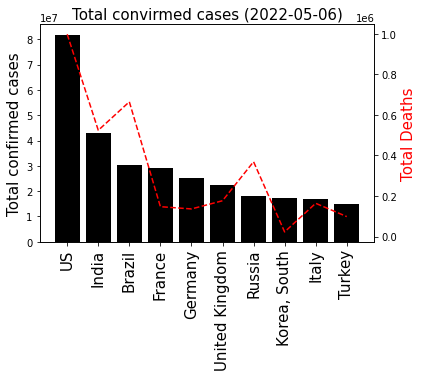

In [49]:
sns.barplot(x=top_ten_cases.index,y=top_ten_cases,color='black')
plt.xticks(rotation=90,size=15)
plt.ylabel('Total confirmed cases',size=15)
plt.xlabel('')
plt.title('Total convirmed cases (%s)' % top_ten_cases.name.strftime('%Y-%m-%d'),size=15)
ax = plt.gca()
ax2 = ax.twinx()

ax2.plot(top_ten_deaths.index,top_ten_deaths,'r--')
ax2.set_ylabel('Total Deaths',color='red',size=15)
plt.show()

In [50]:
top_ten_deaths = df_death.loc[df_death.index[-1]].sort_values(ascending=False)[:10]
top_ten_cases = df_case.loc[df_case.index[-1]][top_ten_deaths.index]

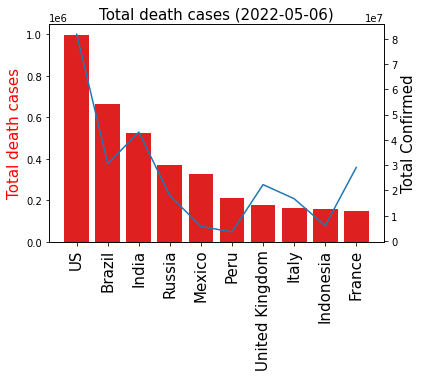

In [53]:
sns.barplot(x=top_ten_deaths.index,y=top_ten_deaths,color='red')
plt.xticks(rotation=90,size=15)
plt.ylabel('Total death cases',size=15,color='red')
plt.xlabel('')
plt.title('Total death cases (%s)' % top_ten_deaths.name.strftime('%Y-%m-%d'),size=15)
ax = plt.gca()
ax2 = ax.twinx()

ax2.plot(top_ten_cases.index,top_ten_cases)
ax2.set_ylabel('Total Confirmed',size=15)
plt.show()

In [55]:
top_ten_cases = df_case.loc[df_case.index[-1]].sort_values(ascending=False)[:10]
top_ten_deaths = df_death.loc[df_death.index[-1]][top_ten_cases.index]

In [71]:
def plot_case_with_death(country):
  plt.xticks(rotation=45)
  plt.plot(df_case.index,df_case[country],'b-')
  plt.ylabel('confirmed cases',color='blue')
  plt.title(country+'cases & deaths')
  plt.xlim(right=df_case.index[-1])
  plt.ylim(0,df_case[country].max()*1.1)

  ax = plt.gca()
  ax2 = ax.twinx()
  ax2.plot(df_death.index,df_death[country],'r--')
  ax2.set_ylabel('Deaths',color='red')
  ax2.set_ylim(0,df_death[country].max()*1.3)
  plt.show()

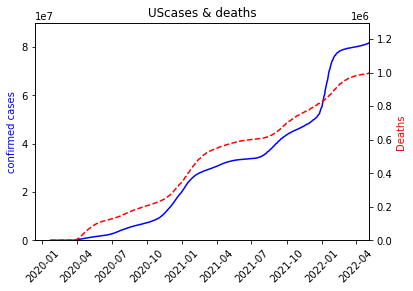

In [73]:
plot_case_with_death('US')

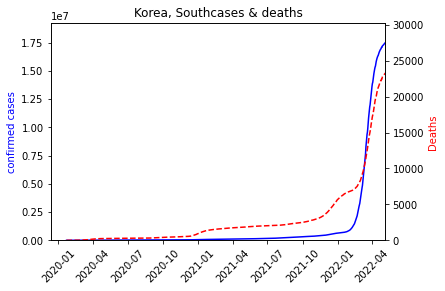

In [74]:
plot_case_with_death('Korea, South')

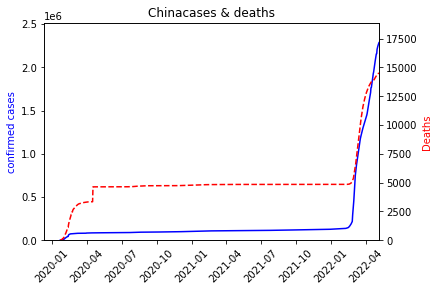

In [75]:
plot_case_with_death('China')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  del sys.path[0]


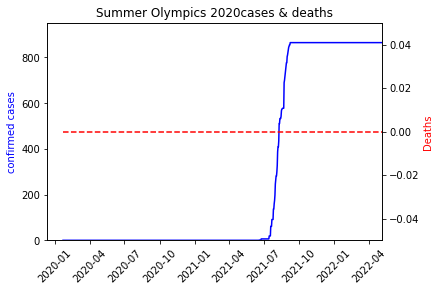

In [77]:
plot_case_with_death('Summer Olympics 2020')

In [78]:
def plot_case_with_death_for_day(country):
  plt.xticks(rotation=45)
  plt.plot(df_case.index,df_case[country].diff(),'b-')
  plt.ylabel('confirmed cases',color='blue')
  plt.title(country+'cases & deaths')
  plt.xlim(right=df_case.index[-1])
  plt.ylim(bottom=0)

  ax = plt.gca()
  ax2 = ax.twinx()
  ax2.plot(df_death.index,df_death[country],'r--')
  ax2.set_ylabel('Deaths',color='red')
  ax2.set_ylim(bottom=0)
  plt.show()

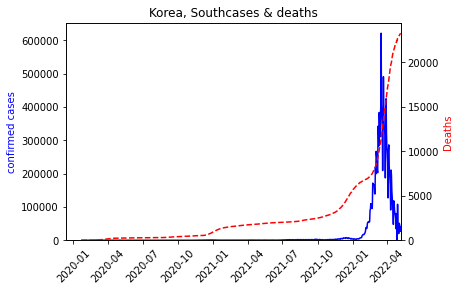

In [79]:
plot_case_with_death_for_day('Korea, South')

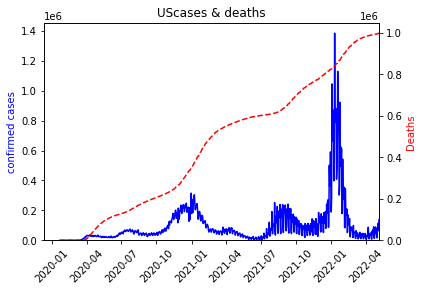

In [80]:
plot_case_with_death_for_day('US')

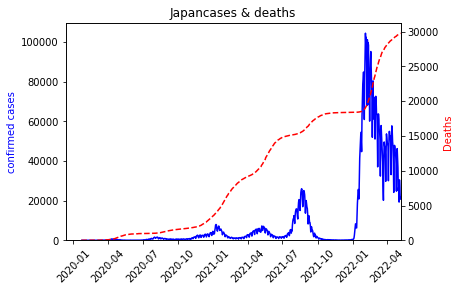

In [81]:
plot_case_with_death_for_day('Japan')

In [87]:
df = pd.DataFrame(df_case.reset_index()[['Date','Korea, South']].to_numpy(),columns=['ds','y'])

In [89]:
from math import floor

In [94]:
def train_test_split_df(df,test_size):
  div = floor(df.shape[0]*(1-test_size))
  return df.loc[:div],df.loc[div+1:]

In [114]:
train_df,test_df = train_test_split_df(df,0.1)

In [115]:
train_df.tail()

,ds,y
748,2022-02-08,1131239
749,2022-02-09,1185361
750,2022-02-10,1239287
751,2022-02-11,1294205
752,2022-02-12,1350630


In [116]:
test_df.head()

,ds,y
753,2022-02-13,1405246
754,2022-02-14,1462421
755,2022-02-15,1552851
756,2022-02-16,1645978
757,2022-02-17,1755806


In [117]:
from fbprophet import Prophet

In [118]:
model = Prophet()
model.fit(train_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [119]:
from fbprophet.plot import add_changepoints_to_plot

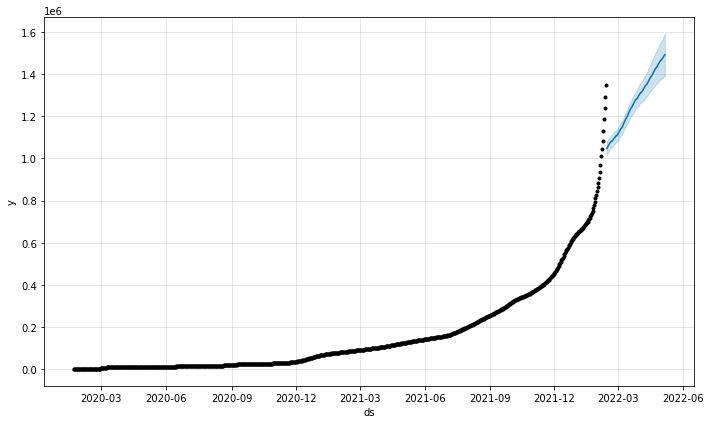

In [120]:
pred = model.predict(test_df)
model.plot(pred);

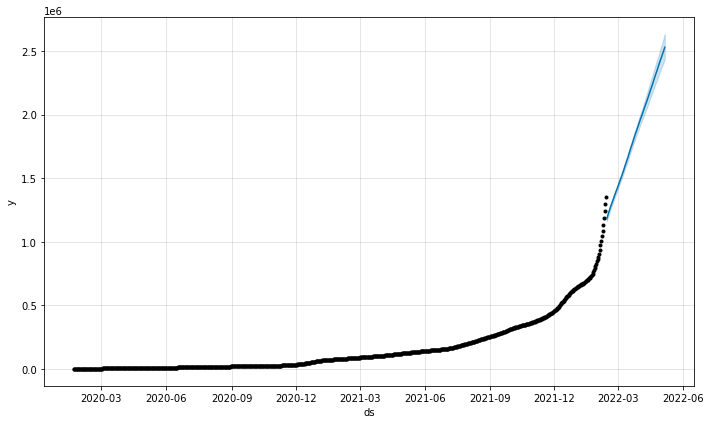

In [128]:
pred2 = model2.predict(test_df)
model2.plot(pred2);

In [133]:
model2 = Prophet(changepoint_range=1.0)
model2.fit(train_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


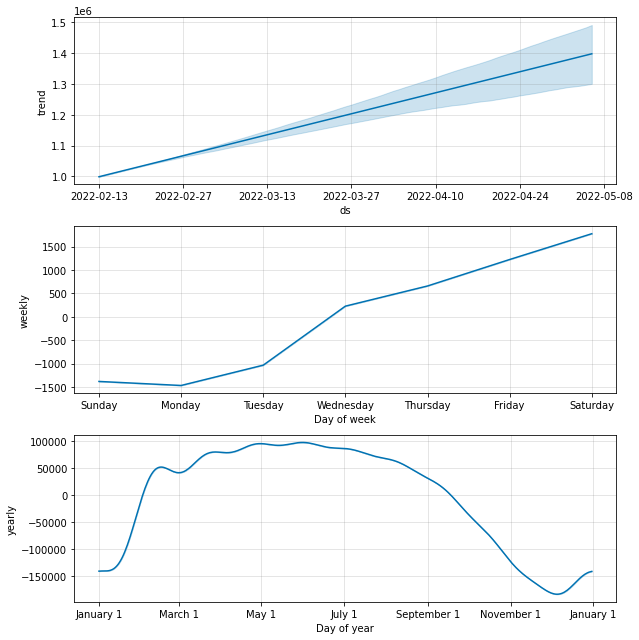

In [134]:
model.plot_components(pred);

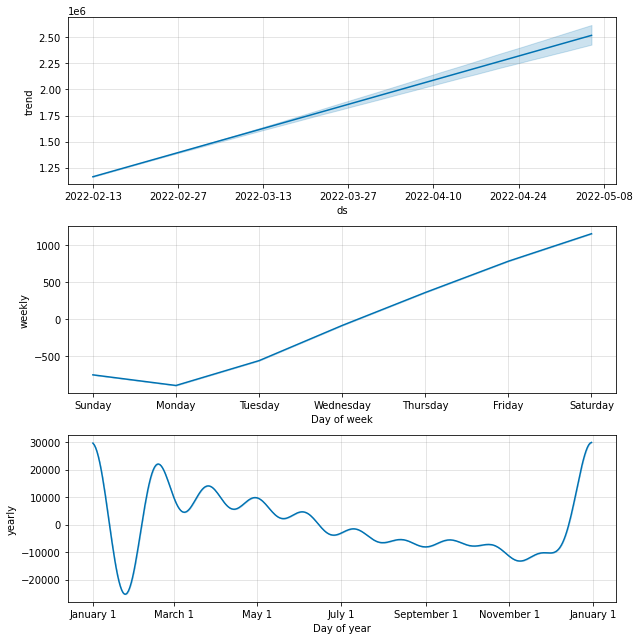

In [135]:
model2.plot_components(pred2);

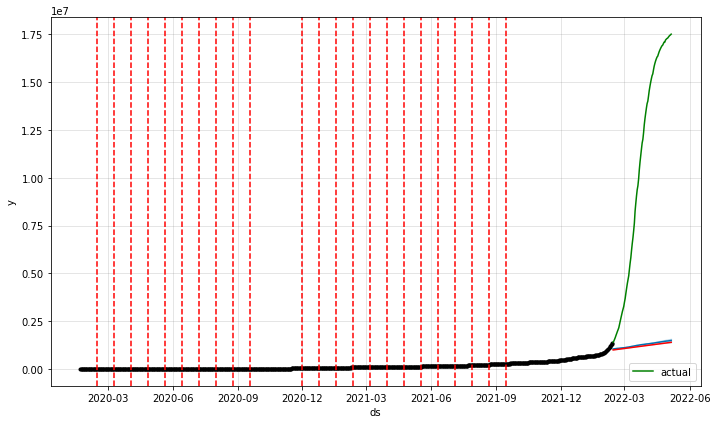

In [136]:
fig = model.plot(pred)
plt.plot(test_df['ds'],test_df['y'],'g-',label='actual')
add_changepoints_to_plot(fig.gca(),model,pred)
plt.legend()

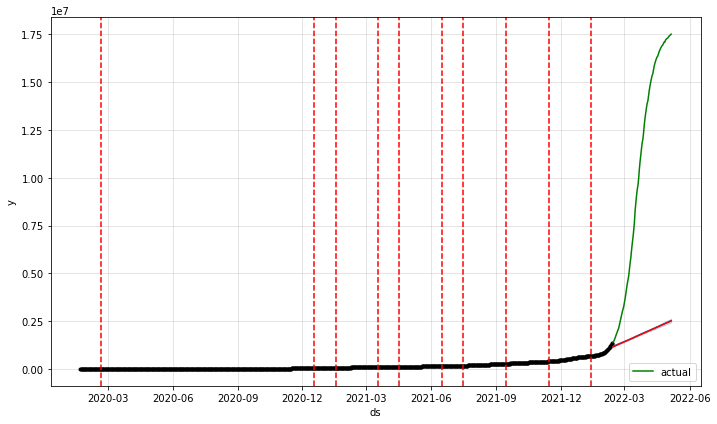

In [137]:
fig = model.plot(pred2)
plt.plot(test_df['ds'],test_df['y'],'g-',label='actual')
add_changepoints_to_plot(fig.gca(),model2,pred2)
plt.legend()

In [138]:
from sklearn.metrics import r2_score

In [141]:
print('R2 score:',r2_score(test_df['y'],pred2['yhat']))

R2 score: -2.1166727910569434


예상보다 훨씬 안좋음

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


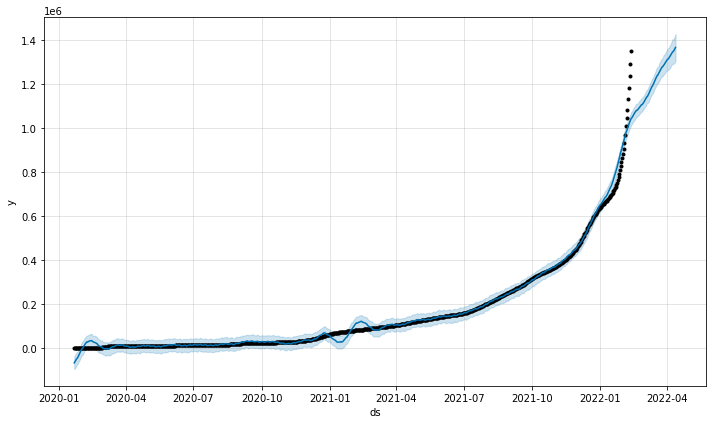

In [143]:
model3 = Prophet(changepoint_range=1.0)
model3.fit(df)
future = model.make_future_dataframe(60)
pred = model.predict(future)
model.plot(pred);

In [146]:
df['ds'][10]

Timestamp('2020-02-01 00:00:00')

In [160]:
df.loc[24:30]

,ds,y
24,2020-02-15,28
25,2020-02-16,29
26,2020-02-17,30
27,2020-02-18,31
28,2020-02-19,31
29,2020-02-20,104
30,2020-02-21,204


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


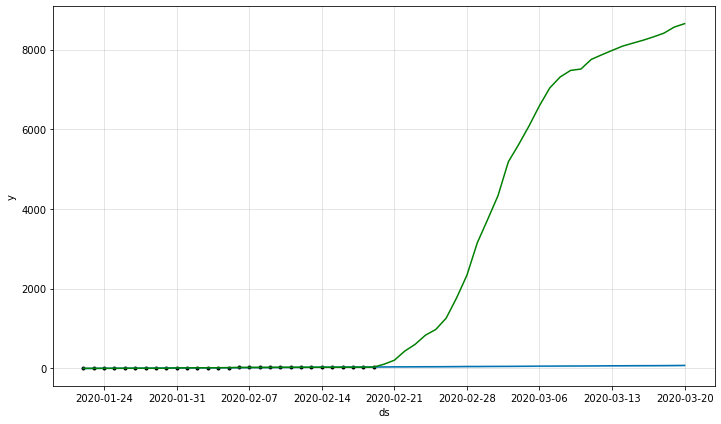

In [166]:
model = Prophet(changepoint_range=1.0)
model.fit(df.loc[:28])
future = model.make_future_dataframe(30)
pred = model.predict(future)
model.plot(pred);
plt.plot(df.loc[:58]['ds'],df.loc[:58]['y'],'g-')